# Predicting NASDAQ Stock Index Price
The objective of the project is for exploration and testing of different methods of machine learning, more specifically, methods learned in class and various other methods practiced throughout the market. There are many implications that you can acquire from the robust data available to investors we wanted to determine if we could exploit some of these ideas so that we might have a better understanding of how the market performs and if it was possible to predict prices. It is well known that it is challenging to predict stock market prices due to the presence of volatility, nevertheless, we wanted to encounter and explore this challenge for ourselves. We used multiple different methods to determine the best features to use for the model then we deployed some models using neural networks to help us understand the behaviors of the ever changing market place.

Accurate prediction of the stock market would be tremendous for the financial industry, or anybody for that matter. In reality, we know that this is a very difficult task and no one has quite been able to perfect the algorithm, that being said, we only hope to be inspired by the project to develop a better model in the future based on the same ideas that we deployed for this project. The number one rule when talking about the market is 'never lose money'. Risk comes from those that are not prepared or those that don't understand the data. Technology is far from being able to predict the future, but if we can understand the data and determine a way to leverage its insights we can make better investments with higher returns.

“Forecasts may tell you a great deal about the forecaster; they tell you nothing about the future.” -Warren Buffet


# Data
NASDAQ index data is available online through various financial data aggregators, 
we used Alpha Vantage API to procure our data. We collected the obvious ones: 'Open', 'Close' etc. but we also 
wanted to see if factors like method of moments or weighted moving average would help us in better predicting the 'close' price. 
The time-series dataset contains 2518 instances (days),approximately 10 years worth of data. Each instance in the
data set contains 24 features for which we will leverage in making predictions.


## Import Statements and Data Import

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpha_vantage
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Lasso
from pandas import Series
import time
import csv 
import json
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score,mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from ta import *
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from IPython.display import display
import io
plt.rcParams['figure.figsize'] = (18, 12)
# file='NASDAQ_FEATURES.csv'

## Setting up the dataframes for future use

In [273]:
data1=pd.DataFrame()
data1=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data1=data1.reset_index(drop=True)
data2=pd.DataFrame()
data2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data2=data2.reset_index(drop=True)
data3=pd.DataFrame()
data3=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data3=data3.reset_index(drop=True)
data4=pd.DataFrame()
data4=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data4=data4.reset_index(drop=True)
data5=pd.DataFrame()
data5=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col='timestamp')
data5=data5.reset_index(drop=True)
# print(data1.head())
# print('Number of observations:' ,len(data1))
# print('Number of observations:' ,len(data2))
# print('Number of observations:' ,len(data3))
# print('Number of observations:' ,len(data4))
# print('Number of observations:' ,len(data5))

## Setting the dataframes to the same structure/information so that we can use the individual data and accompanying features

In [235]:
high_diff=data1['high']-data1['open']
data1['high_diff']=high_diff
low_diff=data1['open']-data1['low']
data1['low_diff']=low_diff
# Do this for each 
daily_diff=data1['close']-data1['open']
data1['daily_diff']=daily_diff
daily_diff=data2['close']-data2['open']
data2['daily_diff']=daily_diff
daily_diff=data3['close']-data3['open']
data3['daily_diff']=daily_diff
daily_diff=data4['close']-data4['open']
data4['daily_diff']=daily_diff
daily_diff=data5['close']-data5['open']
data5['daily_diff']=daily_diff
print(data1.head(2))
print(data2.head(2))
print(data3.head(2))
print(data4.head(2))
print(data5.head(2))
 #I made this list just case we need to use it later to build model   &&   #  maybe take out daily change percentage
feature_list = ['open','high','low', 'close', 'volume','RSI','SMA','EMA',\
    'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
        'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down','daily_diff','high_diff','low_diff']
# np.isnan(data.values.any())

   Day   open   high      low  close   volume      SMA      EMA      WMA  \
0    1  19.28  19.28  18.9011  18.97  2865400  18.8059  18.9620  18.8952   
1    2  19.51  19.90  19.2805  19.51  4250700  18.9225  19.0305  19.0017   

      DEMA  ...     ROC  Aroon Down  Aroon Up  Real Lower Band  \
0  18.6837  ... -7.0098     53.3333   10.0000          18.6586   
1  18.8035  ... -4.5966     50.0000    6.6667          18.5304   

   Real Middle Band  Real Upper Band      SAR  high_diff  low_diff  daily_diff  
0            19.090          19.5214  18.7400       0.00    0.3789       -0.31  
1            19.182          19.8336  18.9011       0.39    0.2295        0.00  

[2 rows x 28 columns]
   Day   open   high      low  close   volume      SMA      EMA      WMA  \
0    1  19.28  19.28  18.9011  18.97  2865400  18.8059  18.9620  18.8952   
1    2  19.51  19.90  19.2805  19.51  4250700  18.9225  19.0305  19.0017   

      DEMA  ...      RSI      ADX     ROC  Aroon Down  Aroon Up  \
0  18.6837

## Reason why we are using Lasso Regression (write something here lol)

## LASSO REGRESSION
# May be worth it to look into improving this regressor


In [236]:

Xs = data1.drop(['daily_diff','open','close','high','low'], axis=1)
print(Xs.head())


y = data1['daily_diff'].values.reshape(-1,1)

lasso = Lasso(alpha=.10,normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
# Below are all the scoring methods for lasso regressors...I do think that we need to improve this part....But we can do it later.
# ‘neg_mean_squared_log_error’
# 'neg_mean_squared_error'
# r2
# ‘explained_variance’

lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv = 5)

lasso_regressor.fit(Xs, y)

print("The best parameter is:", lasso_regressor.best_params_)
print("The best score is:", lasso_regressor.best_score_)

   Day   volume      SMA      EMA      WMA     DEMA     KAMA    MACD  \
0    1  2865400  18.8059  18.9620  18.8952  18.6837  18.5065 -0.1574   
1    2  4250700  18.9225  19.0305  19.0017  18.8035  18.5574 -0.0297   
2    3  3994300  19.0417  19.1342  19.0674  18.9715  18.6479  0.0874   
3    4  2845400  19.1392  19.2149  19.1812  19.1026  18.7763  0.2081   
4    5  3794600  19.1783  19.1605  19.1962  19.0346  18.7674  0.2876   

   MACD_Hist  MACD_Signal  ...      ADX     ROC  Aroon Down  Aroon Up  \
0     0.4662      -0.6236  ...  11.2525 -7.0098     53.3333   10.0000   
1     0.4902      -0.5199  ...  10.8821 -4.5966     50.0000    6.6667   
2     0.4926      -0.4052  ...  10.5242 -1.9259     46.6667    3.3333   
3     0.4949      -0.2868  ...  10.1781 -4.8581     43.3333    0.0000   
4     0.4593      -0.1718  ...  10.2776 -7.9863     40.0000   13.3333   

   Real Lower Band  Real Middle Band  Real Upper Band      SAR  high_diff  \
0          18.6586            19.090          19.52

/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective di

The best parameter is: {'alpha': 0.0001}
The best score is: 0.8171544775616145


## PRE-PROCESSING For Lasso Regressor

In [237]:
# Separate the train and test data 80/20
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=.10, random_state=10)
#Implement LASSO REGRESSION
lassoReg = Lasso(alpha=0.15, normalize=False)
lassoReg.fit(X_train,y_train)
pred_cv = lassoReg.predict(X_test)
# RETRIEVE MSE
mse = np.mean((pred_cv - y_test)**2)
print("MSE for lasso Regression:",mse)
print("Score for Lasso Regression:",lassoReg.score(X_test,y_test))
coeffs = lassoReg.coef_       
print("Lasso Coefficients:",coeffs)
coeffs = lassoReg.sparse_coef_  
print("Lasso Sparse coefficients:",coeffs)
coeffs = lassoReg.intercept_    
print("Lasso Intercept:",coeffs)


MSE for lasso Regression: 0.5201994266454731
Score for Lasso Regression: 0.39297965000078183
Lasso Coefficients: [ 9.21944271e-05  3.59782397e-08 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -1.38234750e-02  9.19372668e-03
  2.73128400e-02 -1.87703613e-04 -0.00000000e+00  1.91830013e-03
 -2.83965144e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.94790622e-03  8.88911718e-02 -8.91638683e-02]
Lasso Sparse coefficients:   (0, 0)	9.219442708359553e-05
  (0, 1)	3.597823974305951e-08
  (0, 10)	-0.013823474950603902
  (0, 11)	0.00919372668481109
  (0, 12)	0.027312840031070998
  (0, 13)	-0.00018770361275321354
  (0, 15)	0.0019183001342712703
  (0, 16)	-0.0028396514363569895
  (0, 20)	-0.0019479062195889504
  (0, 21)	0.08889117182530523
  (0, 22)	-0.08916386827810002
Lasso Intercept: [-1.16922251]


## Need to fix this to the values that we are receiving for this project

Looking @ the result above we notice that the results give us sparse coefficients for 'Open','Close' & 'Volume'. 
We are going to come back and build a model with just those features in the near future but for now, we just want to see 
how the model performs if we use all the features of the data (28 total). 

$$•OpenCoef_=0.96322411$$
$$•CloseCoef_=0.00533752$$
$$•VolumeCoeff_=0.00120249$$
$$•LassoIntercept=69.49548245 $$
$$The best parameter is: {'alpha': 10}$$
$$The best score is: 0.999082309448763$$
BUT...The MSE is high so we do not want to rely on this model.


# The score of this  LASSO Regressor model is bad.




## Make a list of dataframe objects so that we can iterate over them to perform needed tasks 

In [238]:
data_list=[data1,data2,data3,data4,data4,data5]

## First we need to normalize the data for later use 

In [199]:

# feature_list = ['close','volume','RSI','SMA','EMA',\
#     'MACD','MACD_Hist','MACD_Signal','SlowD','SlowK','WMA','Real Upper Band','Real Lower Band',\
#         'Real Middle Band','KAMA','DEMA','ADX','Aroon Up','Aroon Down','daily_diff']
def get_normalized_data(data,feature_list,scaler=None):
    
    # Initialize a scaler, then apply it to the features
    if scaler=='MinMaxScaler()':
        scaler = MinMaxScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])
    if scaler=='StandardScaler()':
        scaler=StandardScaler()
        data[feature_list] = scaler.fit_transform(data[feature_list])

    return data
normalized_stocks_list=[]
for data in data_list:
    normalized_stocks=get_normalized_data(data,feature_list,scaler='MinMaxScaler()')
    normalized_stocks_list.append(normalized_stocks)



/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/trevor/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: Data

## Create new dataframe object which have all been normalized

In [279]:
data1_normalized=normalized_stocks_list[0]
# data1_normalized=data1_normalized.drop(['open'],axis=1)
# print(data1_normalized)
# data2_normalized=normalized_stocks_list[1]
data3_normalized=normalized_stocks_list[2]
print(data3_normalized.head(2))
data4_normalized=normalized_stocks_list[3]
data5_normalized=normalized_stocks_list[4]
# print(data1_normalized.head(1))
# print(data2_normalized.head(1))
# print(data3_normalized.head(1))
# print(data4_normalized.head(1))
# print(data5_normalized.head(1))

   Day      open      high       low     close    volume       SMA       EMA  \
0    1  0.020563  0.017348  0.019644  0.018891  0.148011  0.010972  0.011037   
1    2  0.023161  0.024354  0.023975  0.025000  0.224662  0.012348  0.011844   

        WMA      DEMA  ...       RSI       ADX     ROC  Aroon Down  Aroon Up  \
0  0.011671  0.010676  ...  0.398477  0.133225 -7.0098    0.533333  0.100000   
1  0.012921  0.012063  ...  0.487872  0.124542 -4.5966    0.500000  0.066667   

   Real Lower Band  Real Middle Band  Real Upper Band      SAR  daily_diff  
0         0.026435          0.017263         0.014376  18.7400   -0.001671  
1         0.024949          0.018319         0.017831  18.9011    0.001839  

[2 rows x 26 columns]


## May be able to find another way to normalize the data or something to see how the following algorithms respond to the different transforms....

Score of the model is: 2.4939147505237194


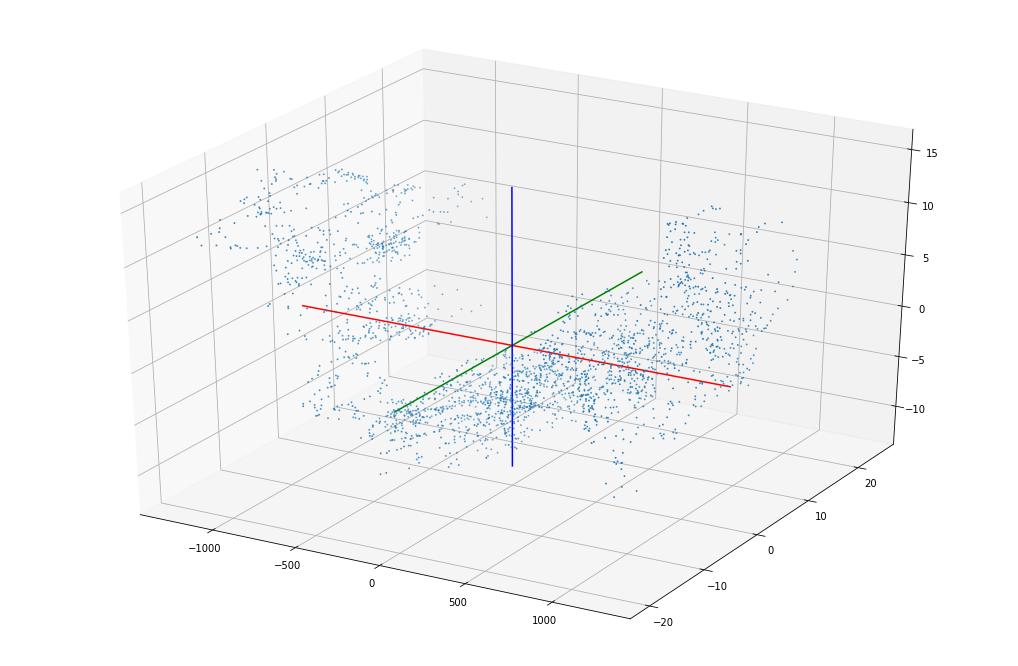

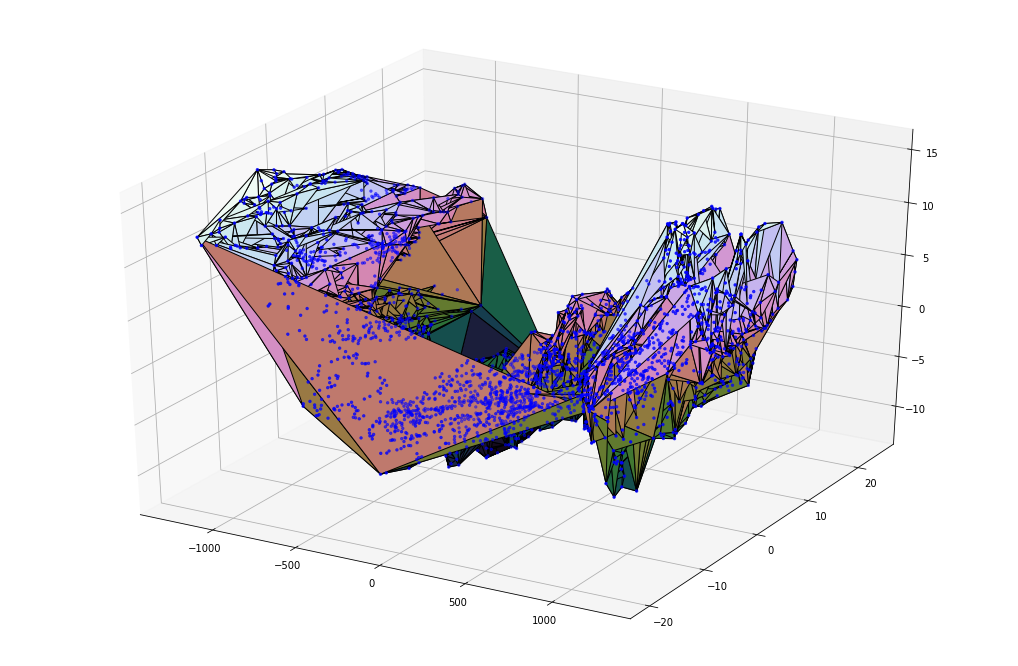

array([9.99836536e-01, 9.47059055e-05, 6.81823173e-05])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

PCA: PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)
explained variance ratio: [9.99836536e-01 9.47059055e-05 6.81823173e-05]
   Day      open      high       low     close    volume       SMA       EMA  \
0    1  0.020563  0.017348  0.019644  0.018891  0.148011  0.010972  0.011037   

        WMA      DEMA  ...       RSI       ADX     ROC  Aroon Down  Aroon Up  \
0  0.011671  0.010676  ...  0.398477  0.133225 -7.0098    0.533333       0.1   

   Real Lower Band  Real Middle Band  Real Upper Band    SAR  daily_diff  
0         0.026435          0.017263         0.014376  18.74    0.469777  

[1 rows x 26 columns]


In [202]:
import seaborn as sns
from mpl_toolkits import mplot3d
from sklearn.decomposition import IncrementalPCA
def plotPCA(data1_normalized):
    pca = PCA(n_components=3,whiten=False,svd_solver='full')
    principalComponents = pca.fit_transform(data1_normalized)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    finalDf = pd.concat([principalDf, data1_normalized[['daily_diff']]], axis = 1)
#     ipca = IncrementalPCA(n_components=3, batch_size=3)
#     principalComponents_incremental=ipca.fit(data1_normalized)
#     principalDf_incremental = pd.DataFrame(data = principalComponents_incremental, columns = ['Principal Component 1', 'Principal Component 2','Principal Component 3'])
    
    # Plot initialisation
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1, projection='3d')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], cmap="Set2_r", s=.8)
    score=pca.score(data1_normalized)
    print("Score of the model is:",score)
    # make simple, bare axis lines through space:
    xAxisLine = ((min(principalDf['Principal Component 1']), max(principalDf['Principal Component 1'])), (0, 0), (0,0))
    ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
    yAxisLine = ((0, 0), (min(principalDf['Principal Component 2']), max(principalDf['Principal Component 2'])), (0,0))
    ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'g')
    zAxisLine = ((0, 0), (0,0), (min(principalDf['Principal Component 3']), max(principalDf['Principal Component 3'])))
    ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'b')
    plt.show()
    ax = plt.axes(projection='3d')
    ax.plot_trisurf(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'],cmap='cubehelix', edgecolor='black')
    ax.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'], principalDf['Principal Component 3'], c='blue', cmap='cubehelix', linewidth=0.9,s=6)
#     targets = data['adjusted_close']
#     colors = ['r', 'g', 'b']
#     for target in targets:
#         indicesToKeep = finalDf['adjusted_close'] == target
#         ax.scatter(finalDf.loc[indicesToKeep, 'Principal Component 1']
#                    , finalDf.loc[indicesToKeep, 'Principal Component 2']
#                    , s = 40)
    
#     ax.grid()
    plt.show()
    display(pca.explained_variance_ratio_)
    display(pca)
    explained_varianceRatio=pca.explained_variance_ratio_
    print("PCA:",pca)
    print("explained variance ratio:",explained_varianceRatio)
plotPCA(data1_normalized)
print(data1_normalized.head(1))

## Explanation of the PCA results...

## Principal Component Analysis

## Correlation matrix and cluster heat map of the Features & breakdown

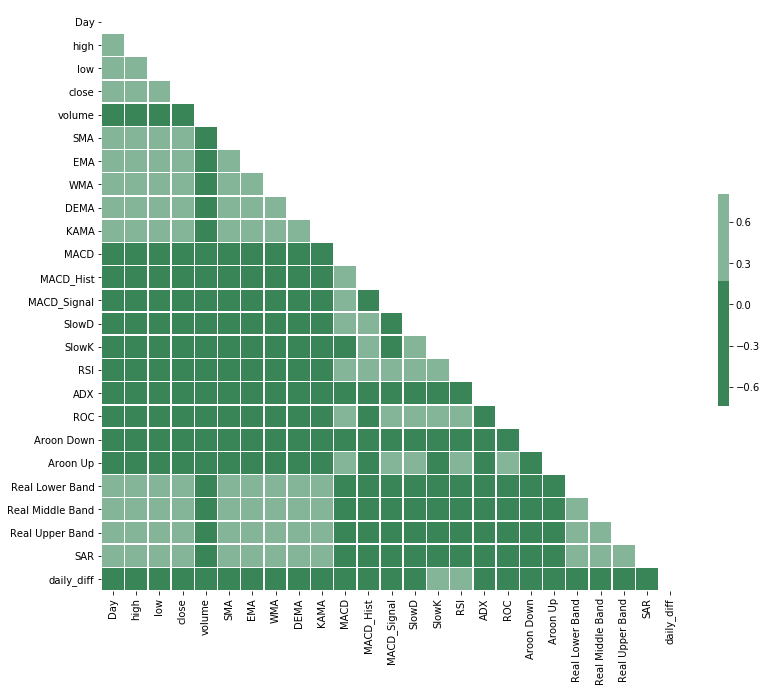

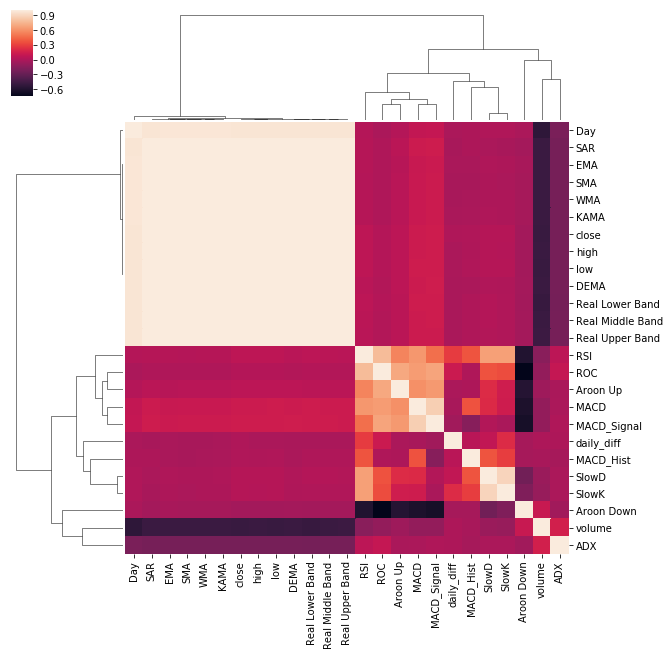

In [180]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr = data1_normalized.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(13,13))
cmap = sns.diverging_palette(500, 800, as_cmap=False)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=2,
            square=True, linewidths=.5, cbar_kws={"shrink": .3})
sns.clustermap(corr)

## Linear Regression

In [243]:
# data_2=pd.DataFrame()
# index=0
# data_2=pd.read_csv('NASDAQ_FEATURES.csv',header=0,encoding = 'unicode_escape',index_col=index)
# # print(data_2)

def scale_range(x, input_range, target_range):
    
    range = [np.amin(x), np.amax(x)]
    x_std = (x - input_range[0]) / (1.0*(input_range[1] - input_range[0]))
    x_scaled = x_std * (1.0*(target_range[1] - target_range[0])) + target_range[0]
    return x_scaled, range
def train_test_split_linear_regression(data2_normalized):
    
    # Create numpy arrays for features and targets
    feature = []
    label = []

    # Convert dataframe columns to numpy arrays for scikit learn
    # fix this later
    for index, row in data2_normalized.iterrows():
        # print([np.array(row['close'])])
        feature.append([row['Day']])
        label.append([(row['daily_diff'])])
        

    # Regularize the feature and target arrays and store min/max of input data for rescaling later
    feature_bounds = [min(feature), max(feature)]
    feature_bounds = [feature_bounds[0][0], feature_bounds[1][0]]
    label_bounds = [min(label), max(label)]
    label_bounds = [label_bounds[0][0], label_bounds[1][0]]

    feature_scaled, feature_range = scale_range(np.array(feature), input_range=feature_bounds, target_range=[-1.0, 1.0])
    label_scaled, label_range = scale_range(np.array(label), input_range=label_bounds, target_range=[-1.0, 1.0])

    # Define Test/Train Split 80/20
    split = .02
    split = int(math.floor(len(data2_normalized['Day']) * split))

    # Set up training and test sets
    X_train = feature_scaled[:-split]
    X_test = feature_scaled[-split:]

    y_train = label_scaled[:-split]
    y_test = label_scaled[-split:]

    return X_train, X_test, y_train, y_test, label_range
data
X_train, X_test, y_train, y_test, label_range= train_test_split_linear_regression(data1.drop(['open','close','high','low'],axis=1))


## Build LinReg Model

In [244]:
def build_model(X, y):
    
    X = np.reshape(X, (X.shape[0], 1))
    y = np.reshape(y, (y.shape[0], 1))
    linear_mod = linear_model.LinearRegression()  # defining the linear regression model
    
    linear_mod.fit(X, y)  # fitting the data points in the model

    return linear_mod
def predict_prices(model, x, label_range):
    
    x = np.reshape(x, (x.shape[0], 1))
    predicted_price = model.predict(x)
    predictions_rescaled, re_range = scale_range(predicted_price, input_range=[-1.0, 1.0], target_range=label_range)

    return predictions_rescaled.flatten()
print("Open   --- mean :", np.mean(data2_normalized['open']),  "  \t Std: ", np.std(data2_normalized['open']),  "  \t Max: ", np.max(data2_normalized['open']),  "  \t Min: ", np.min(data2_normalized['open']))
print("Close  --- mean :", np.mean(data2_normalized['close']), "  \t Std: ", np.std(data2_normalized['close']), "  \t Max: ", np.max(data2_normalized['close']), "  \t Min: ", np.min(data2_normalized['close']))
print("Volume --- mean :", np.mean(data2_normalized['volume']),"  \t Std: ", np.std(data2_normalized['volume']),"  \t Max: ", np.max(data2_normalized['volume']),"  \t Min: ", np.min(data2_normalized['volume']))





Open   --- mean : 0.37273005190781383   	 Std:  0.29165691051358045   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.37529300798953413   	 Std:  0.29199697017716814   	 Max:  1.0   	 Min:  0.0
Volume --- mean : 0.06932781950905381   	 Std:  0.06405387015851811   	 Max:  1.0   	 Min:  0.0


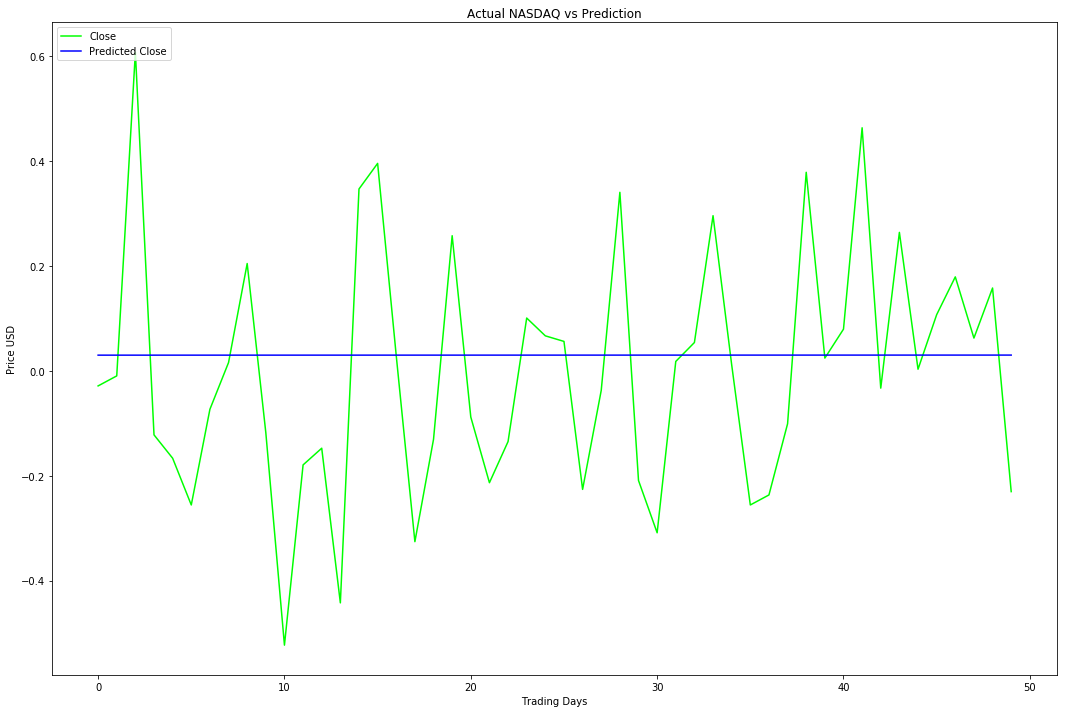

Model Coefficient: [[0.00070897]]
Mean squared error: 0.34
R2= -0.06


In [245]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
def plot_prediction(actual, prediction, title='Actual NASDAQ vs Prediction', y_label='Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()
# Building the model for simple linear regression
model=build_model(X_train,y_train)
simple_predictions=predict_prices(model,X_test, label_range)
plot_prediction(y_test,simple_predictions)
print('Model Coefficient:',model.coef_)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Mean squared error: %.2f"
      % mean_squared_error(X_train, y_train))
print('R2= %.2f' % r2_score(X_train, y_train))



## Preprocessing for LSTM model(s)

In [280]:
import os
# normalized_stocks=data_2
# # normalized_stocks=normalized_stocks.drop('Day',1)
# normalized_stocks=get_normalized_data(normalized_stocks,feature_list,scaler='MinMaxScaler()')
# display(normalized_stocks.shape)
# display(normalized_stocks.head())
print(data1_normalized.head())

   Day      open      high       low     close    volume       SMA       EMA  \
0    1  0.020563  0.017348  0.019644  0.018891  0.148011  0.010972  0.011037   
1    2  0.023161  0.024354  0.023975  0.025000  0.224662  0.012348  0.011844   
2    3  0.020676  0.024285  0.024083  0.028959  0.210475  0.013756  0.013068   
3    4  0.026099  0.024220  0.027279  0.028054  0.146905  0.014907  0.014019   
4    5  0.018190  0.016217  0.014610  0.016742  0.199426  0.015368  0.013378   

        WMA      DEMA  ...     ROC  Aroon Down  Aroon Up  Real Lower Band  \
0  0.011671  0.010676  ... -7.0098    0.533333  0.100000         0.026435   
1  0.012921  0.012063  ... -4.5966    0.500000  0.066667         0.024949   
2  0.013693  0.014007  ... -1.9259    0.466667  0.033333         0.024247   
3  0.015029  0.015525  ... -4.8581    0.433333  0.000000         0.024706   
4  0.015205  0.014738  ... -7.9863    0.400000  0.133333         0.019755   

   Real Middle Band  Real Upper Band      SAR  daily_dif

In [291]:
def train_test_split_lstm(stocks, prediction_time=1, test_data_size=300, unroll_length=50):
    
    # training data
    test_data_cut = test_data_size + unroll_length + 1

    x_train = stocks[0:-prediction_time - test_data_cut].as_matrix()
    y_train = stocks[prediction_time:-test_data_cut]['daily_diff'].as_matrix()

    # test data
    x_test = stocks[0 - test_data_cut:-prediction_time].as_matrix()
    y_test = stocks[prediction_time - test_data_cut:]['daily_diff'].as_matrix()

    return x_train, x_test, y_train, y_test


def unroll(data, sequence_length=24):
    
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)
print(data1_normalized.head(3))
xTrain, xTest,yTrain, yTest = train_test_split_lstm(data1_normalized.drop(['open','Day','close','high','low'],axis=1), 5)

unroll_length = 50

xTrain = unroll(xTrain, unroll_length)
xTest = unroll(xTest, unroll_length)
yTrain = yTrain[-xTrain.shape[0]:]
yTest = yTest[-xTest.shape[0]:]


## Get the shapes of the data
print("x_train", xTrain.shape)
print("y_train", yTrain.shape)
print("x_test", xTest.shape)
print("y_test", yTest.shape)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

   Day      open      high       low     close    volume       SMA       EMA  \
0    1  0.020563  0.017348  0.019644  0.018891  0.148011  0.010972  0.011037   
1    2  0.023161  0.024354  0.023975  0.025000  0.224662  0.012348  0.011844   
2    3  0.020676  0.024285  0.024083  0.028959  0.210475  0.013756  0.013068   

        WMA      DEMA  ...     ROC  Aroon Down  Aroon Up  Real Lower Band  \
0  0.011671  0.010676  ... -7.0098    0.533333  0.100000         0.026435   
1  0.012921  0.012063  ... -4.5966    0.500000  0.066667         0.024949   
2  0.013693  0.014007  ... -1.9259    0.466667  0.033333         0.024247   

   Real Middle Band  Real Upper Band      SAR  daily_diff  high_diff  low_diff  
0          0.017263         0.014376  18.7400   -0.001671  -0.003215  0.000918  
1          0.018319         0.017831  18.9011    0.001839   0.001193 -0.000813  
2          0.020477         0.022664  18.9011    0.008284   0.003610 -0.003407  

[3 rows x 28 columns]
x_train (2112, 50, 23)


/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


## Basic LSTM ->Build the model 
## Note: Need to investigate the appropriate parameters of this model e.g. number of layers and neurons, try out SGD ir sigmoid activation function and determine which optimizer best suits our situation.

In [293]:
def build_basic_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(LSTM(
        128,
        return_sequences=False))

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))

    return model

model=build_basic_model(input_dim = xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)

model.fit(xTrain,yTrain,epochs=5,validation_split=.03)

predictions = model.predict(xTest)

compilation time :  0.03398013114929199
Train on 2048 samples, validate on 64 samples
Epoch 1/5
 928/2048 [============>.................] - ETA: 40s - loss: 0.0027

KeyboardInterrupt: 

## Plot the Basics LSTM model before improvement 

In [ ]:

def plot_lstm_prediction(actual, prediction, title='NASDAQ Index', y_label='Closing Price USD', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values

    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='lower left')


    plt.show()
plot_lstm_prediction(yTest,predictions)

trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

# new_model=train_test_split_lstm(data1_normalized, prediction_time=5, test_data_size=200, unroll_length=50)

## IMPROVEMENT WANTED

## Build the Improved LSTM model

/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/trevor/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


compilation time :  0.04240822792053223
Train on 2006 samples, validate on 106 samples
Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


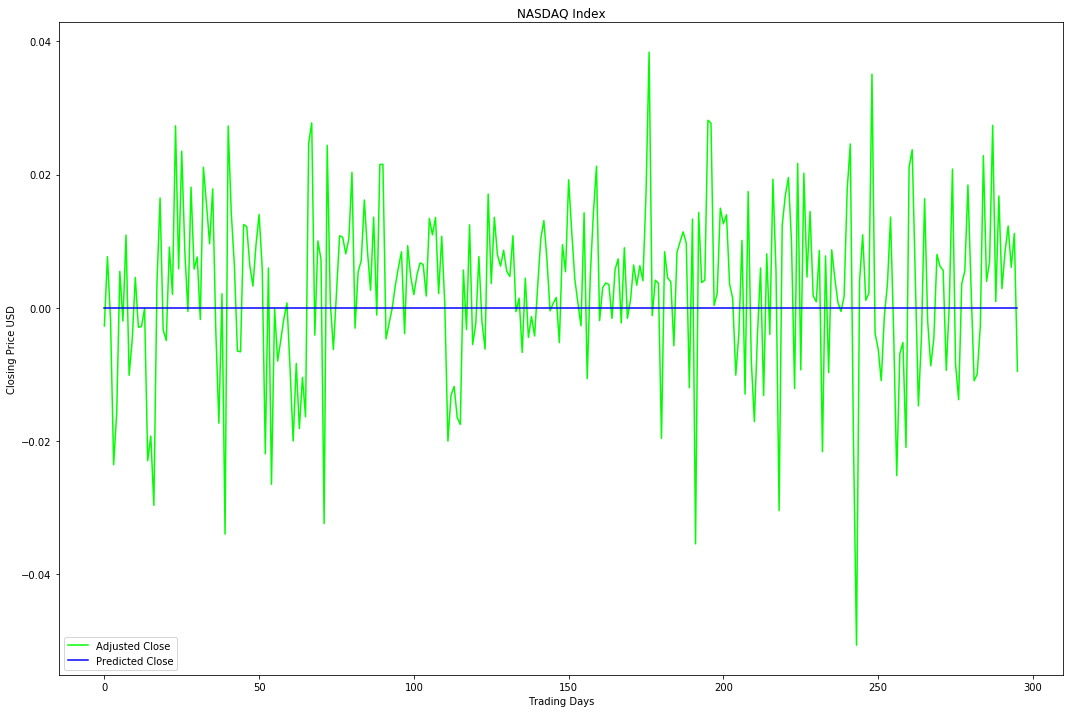

Train Score: 0.00004552 MSE (0.00674668 RMSE)
Test Score: 0.00016235 MSE (0.01274160 RMSE)


In [295]:

new_model=train_test_split_lstm(data1_normalized.drop(['open','Day','close','high','low'],axis=1), prediction_time=5, test_data_size=200, unroll_length=50)
new_model
def build_improved_model(input_dim, output_dim, return_sequences):
    
    model = Sequential()
    model.add(LSTM(
        input_shape=(None, input_dim),
        units=output_dim,
        return_sequences=return_sequences))

    model.add(Dropout(0.2))
# .4 is best so far

    model.add(LSTM(
        128,
        return_sequences=False))

    

    model.add(Dense(
        units=1))
    model.add(Activation('relu'))

    return model


# Set up hyperparameters
batch_size = 25

epochs = 5

# build improved lstm model
model = build_improved_model( xTrain.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

model.compile(loss='mean_squared_error', optimizer='nadam')
print('compilation time : ', time.time() - start)
model.fit(xTrain, yTrain, batch_size=batch_size,epochs=epochs,verbose=3,validation_split=0.05)
predictions = model.predict(xTest, batch_size=batch_size)
plot_lstm_prediction(yTest,predictions)
trainScore = model.evaluate(xTrain, yTrain, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(xTest, yTest, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

